In [44]:
# Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [46]:
df = pd.read_csv('ObesityDataSet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [47]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Let's start by checking the datatype that we have in our dataset:

In [49]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'Gender' has 2 unique categorical items
Column 'Age' has 1402 unique numerical items
Column 'Height' has 1574 unique numerical items
Column 'Weight' has 1525 unique numerical items
Column 'family_history_with_overweight' has 2 unique categorical items
Column 'FAVC' has 2 unique categorical items
Column 'FCVC' has 810 unique numerical items
Column 'NCP' has 635 unique numerical items
Column 'CAEC' has 4 unique categorical items
Column 'SMOKE' has 2 unique categorical items
Column 'CH2O' has 1268 unique numerical items
Column 'SCC' has 2 unique categorical items
Column 'FAF' has 1190 unique numerical items
Column 'TUE' has 1129 unique numerical items
Column 'CALC' has 4 unique categorical items
Column 'MTRANS' has 5 unique categorical items
Column 'NObeyesdad' has 7 unique categorical items


#### Now we can check if we have any missing data:

In [51]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'Gender' has 0 missing values
Column 'Age' has 0 missing values
Column 'Height' has 0 missing values
Column 'Weight' has 0 missing values
Column 'family_history_with_overweight' has 0 missing values
Column 'FAVC' has 0 missing values
Column 'FCVC' has 0 missing values
Column 'NCP' has 0 missing values
Column 'CAEC' has 0 missing values
Column 'SMOKE' has 0 missing values
Column 'CH2O' has 0 missing values
Column 'SCC' has 0 missing values
Column 'FAF' has 0 missing values
Column 'TUE' has 0 missing values
Column 'CALC' has 0 missing values
Column 'MTRANS' has 0 missing values
Column 'NObeyesdad' has 0 missing values


#### Let's check if there are some duplicates and drop them if they exist:

In [53]:
df[df.duplicated()]  # Putting the result into a new dataframe for clarity, there's no duplicated data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [54]:
df.drop_duplicates(inplace = True)

#### Now we can take care of the categorical variables. We will use label encoder:

In [56]:
original_df = df.copy()  # Let's first make a copy of the dataframe for later

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.select_dtypes(include = ['object']).columns:
    df[column] = le.fit_transform(df[column])

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


## Clustering
#### We will start by scaling the dataset:

In [68]:
non_scaled_df = df.copy()      # Let's make a copy of the original dataset so we can compare the clusters with the original features later

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df)
new_df = pd.DataFrame(data = X, columns = df.columns)
new_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,-1.008179,-0.526613,-0.887408,-0.872985,0.460394,-2.754719,-0.788364,0.390906,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,0.554211,1.411836,0.506768,-1.034072
1,-1.008179,-0.526613,-1.960788,-1.178508,0.460394,-2.754719,1.082164,0.390906,0.318128,6.814090,1.636552,4.554073,2.328908,-1.090505,-0.522834,0.506768,-1.034072
2,0.991887,-0.212507,1.044677,-0.376509,0.460394,-2.754719,-0.788364,0.390906,0.318128,-0.146755,-0.007810,-0.219584,1.156947,0.554211,-2.457503,0.506768,-1.034072
3,0.991887,0.415705,1.044677,0.005395,-2.172052,-2.754719,1.082164,0.390906,0.318128,-0.146755,-0.007810,-0.219584,1.156947,-1.090505,-2.457503,1.297220,1.019313
4,0.991887,-0.369560,0.830001,0.112328,-2.172052,-2.754719,-0.788364,-2.225418,0.318128,-0.146755,-0.007810,-0.219584,-1.186977,-1.090505,-0.522834,0.506768,1.532660


#### The next step consists in reducing the dimensions of the dataset. We will use PCA for this purpose, using 2 variables:

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(new_df)
df_pca = pd.DataFrame(pca.transform(new_df), columns = (['col1', 'col2']))
df_pca.head()

,col1,col2
0,-2.104497,-0.314362
1,-2.786993,0.507208
2,-0.022886,2.027116
3,-0.072412,0.991074
4,-0.501631,-0.470673


Text(0, 0.5, 'PCA2 (col2)')

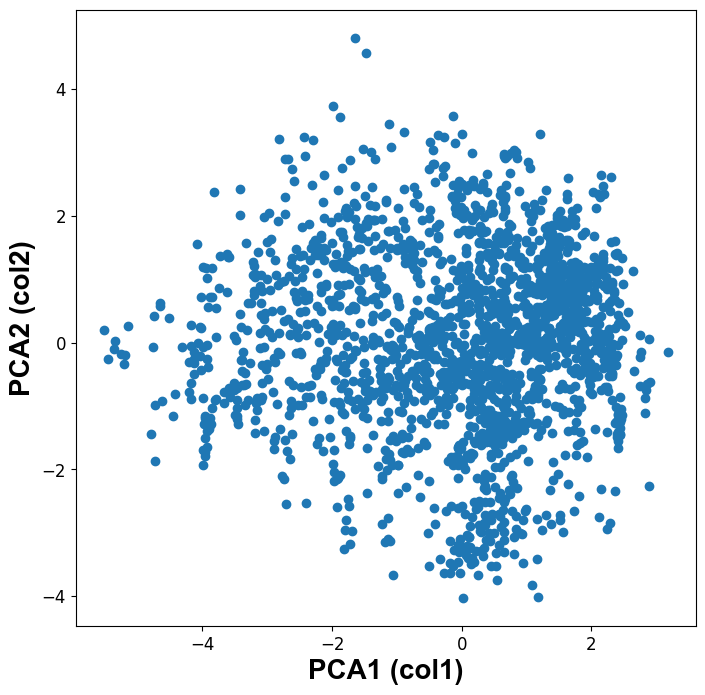

In [73]:
plt.figure(figsize = (8, 8))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.scatter(df_pca['col1'], df_pca['col2'])
plt.xlabel('PCA1 (col1)', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('PCA2 (col2)', fontsize = 20, fontweight='bold', **csfont)

#### Now we can apply the elbow method to obtain the optimal number of clusters:

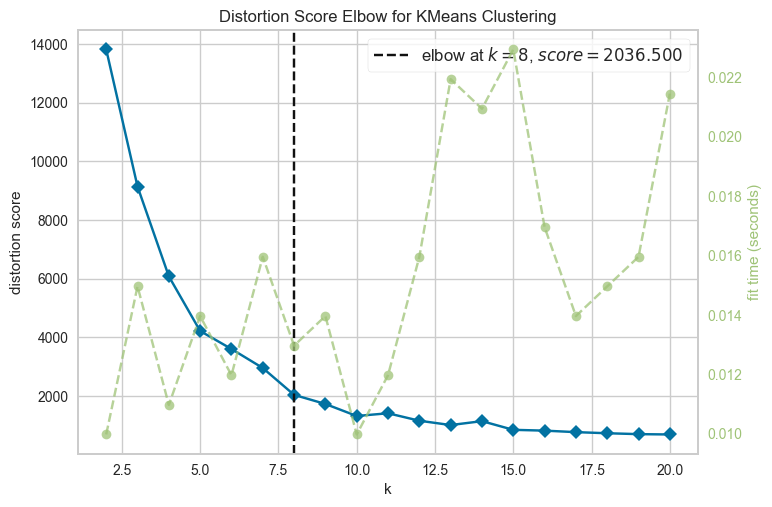

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(df_pca)
Elbow_M.show()

#### Now that we know that the optimal number of clusters is 8, we can perform the clustering process:

In [110]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 8)
y_pred = ac.fit_predict(df_pca)
df_pca['Clusters'] = y_pred
non_scaled_df['Clusters'] = y_pred
original_df['Clusters'] = y_pred
df_pca.head()

,col1,col2,Clusters
0,-2.104497,-0.314362,7
1,-2.786993,0.507208,4
2,-0.022886,2.027116,3
3,-0.072412,0.991074,3
4,-0.501631,-0.470673,1


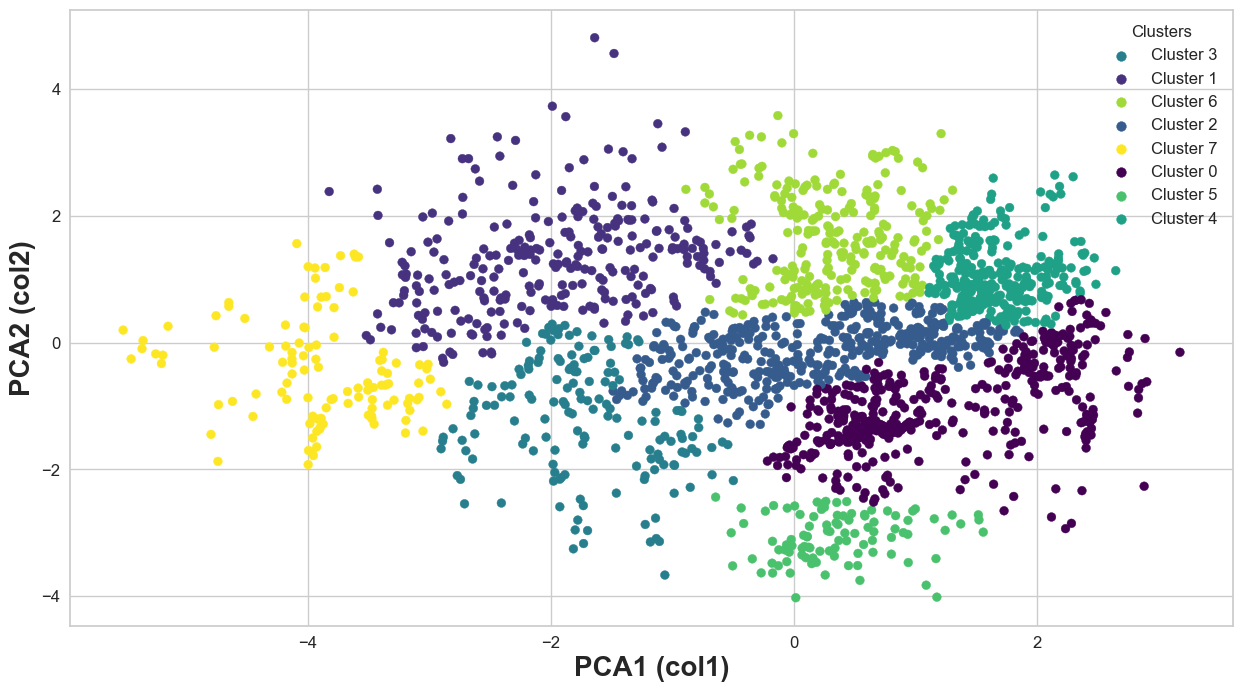

In [108]:
plt.figure(figsize = (15, 8))
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.scatter(df_pca['col1'], df_pca['col2'], s = 40, c = df_pca['Clusters'], cmap = 'viridis')
plt.xlabel('PCA1 (col1)', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('PCA2 (col2)', fontsize = 20, fontweight='bold', **csfont)
unique_clusters = df_pca['Clusters'].unique()

for cluster in unique_clusters:
    plt.scatter([], [], color=plt.cm.viridis(cluster / df_pca['Clusters'].max()), label=f'Cluster {cluster}')

plt.legend(title='Clusters', fontsize=12)